<a href="https://colab.research.google.com/github/harnalashok/exercises/blob/main/notebookaa35a2090e_AstikNigam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Author: Astik Nigam
# Commented: Ashok K Harnal

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import os

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
###os.chdir("C:\\Users\\ASTIK NIGAM\\Desktop\\FSM Training\\DV_exercises")
ad = pd.read_csv('Churn_Modelling.csv')

In [4]:
ad.head()
ad.info()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
# Define two general functions to annotate plots with percentages:
# See StackOverflow: https://stackoverflow.com/a/62053049
# To be used whereever countplot() is being used or catplot()

def with_hue(plot, feature, Number_of_levels, hue_levels):
    """
    Number_of_levels: No of levels in main feature
    hue_levels: No of levels in hue feature
    """
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_levels):
        total = feature.value_counts().values[i]
        for j in range(hue_levels):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_levels + i)]/total)
            x = patch[(j*Number_of_levels + i)].get_x() + patch[(j*Number_of_levels + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_levels + i)].get_y() + patch[(j*Number_of_levels + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

In [ ]:
ad.shape

(10000, 14)

In [ ]:
ad.columns.values

array(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype=object)

In [ ]:
ad.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
ad.dtypes.value_counts()

int64      9
object     3
float64    2
dtype: int64

In [5]:
#pd.options.display.max_columns = 10
pd.set_option("display.max.columns" , 20)
ad

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
len(ad)

10000

In [6]:
ad.drop(columns=['RowNumber','Surname'], inplace = True)
ad.shape

(10000, 12)

In [ ]:
ad.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
#num of customers churned and retained
exit_count=ad['Exited'].value_counts()
exit_count

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
cat=['Retained','Churned']
ad["Churned/Retained"]=pd.cut( 
                                ad['Exited'],
                                bins=2,
                                labels=cat
)

ad.to_csv('churn_mod.csv', index=False)

<AxesSubplot:xlabel='Churned/Retained', ylabel='count'>

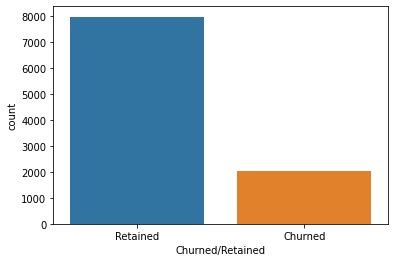

In [ ]:
y = np.array(ad['Churned/Retained'].value_counts())
sns.countplot(x = 'Churned/Retained', data = ad)

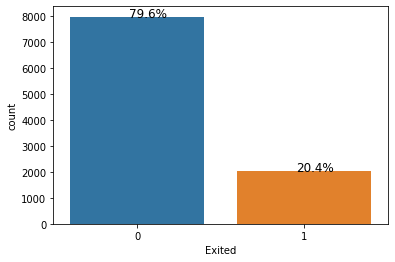

In [20]:
###$ The above graph can be made nore informative ,as:

ax = sns.countplot(x = 'Exited', data = ad)
without_hue(ax,ad.Exited)

([<matplotlib.patches.Wedge at 0x7f02618b7690>,
 [Text(-0.8823431426537007, 0.6568642010431011, ''),
  Text(0.8823431426537006, -0.6568642010431012, '')],
 [Text(-0.48127807781110943, 0.3582895642053278, '79.6%'),
  Text(0.4812780778111093, -0.35828956420532787, '20.4%')])

Text(0.5, 1.0, '% customer churned and retained')

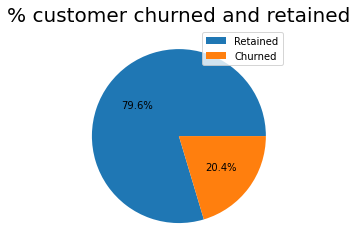

In [ ]:
y = np.array(ad['Churned/Retained'].value_counts())
labels = 'Retained','Churned'
plt.pie(y,autopct='%1.1f%%')
plt.title("% customer churned and retained", size = 20)
plt.legend(labels=labels)
plt.show() 

<AxesSubplot:xlabel='Churned/Retained', ylabel='count'>

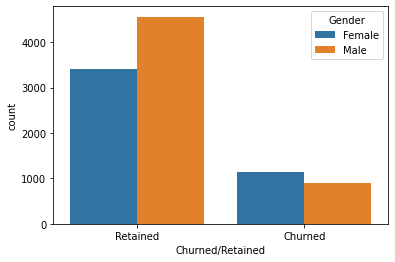

In [ ]:
#checking the customer churn gender wise as it comes out to be more among Females
sns.countplot(
                  x = 'Churned/Retained',   
                  hue = 'Gender',       
                  data = ad
                 )

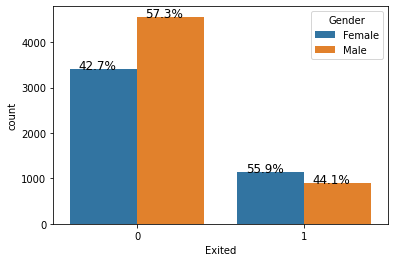

In [21]:
###$ Either this way of
#checking the customer churn gender wise as it comes out to be more among Females
ax = sns.countplot(
                  x = 'Exited',   
                  hue = 'Gender',       
                  data = ad
                 )

with_hue(ax,ad.Exited,2,2)

In [22]:
###$ Helps in comparing two adjacent bars
def percent_graph(grby,hue, data):
  so = data.groupby(grby)[hue].value_counts(normalize = True)
  so.name = '%count'
  t = so.reset_index()
  sns.set_theme(style="whitegrid")
  sns.barplot(x = grby, y = '%count', hue= hue, data= t)

<Figure size 288x432 with 0 Axes>

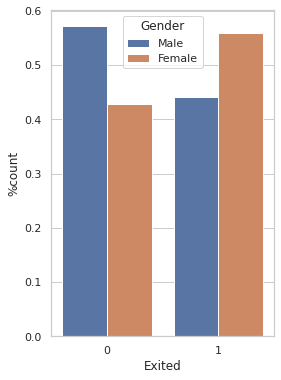

In [25]:
plt.figure(figsize=(4,6))
percent_graph('Exited', 'Gender', ad)

In [ ]:
#checking the various countries and number of customers as per geography
country=ad['Geography'].value_counts()
country

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

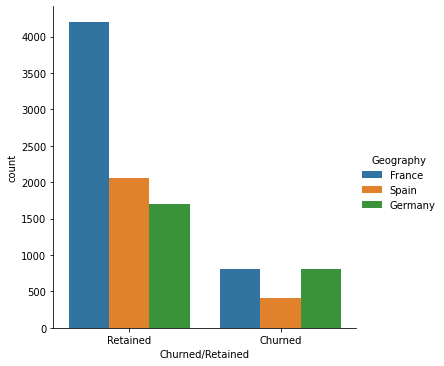

In [ ]:
sns.catplot(
               x = 'Churned/Retained',
               hue = 'Geography',
               kind = 'count',
               data = ad
             )

In [ ]:
#Tenure count
ad['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [ ]:
#cCategorizing the tenure
ad["Tenure_cat"]=pd.cut( 
                                ad['Tenure'],
                                bins=[0,2,5,10],
                                labels=['short','medium','long']
)

ad.to_csv('churn_mod.csv', index=False)

<AxesSubplot:xlabel='Churned/Retained', ylabel='count'>

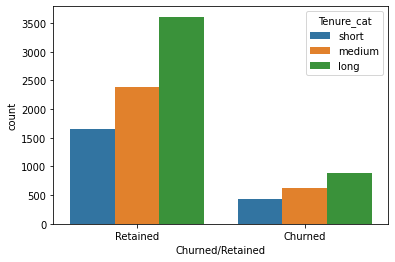

In [ ]:
sns.countplot(
                  x = 'Churned/Retained',   
                  hue = 'Tenure_cat',       
                  data = ad
                 )

(array([ 611., 2179., 3629., 1871.,  828.,  523.,  208.,  127.,   20.,
           4.]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <BarContainer object of 10 artists>)

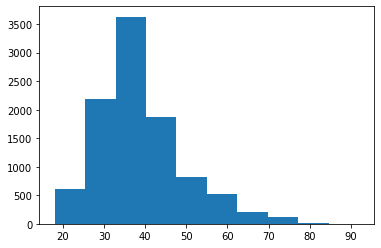

In [ ]:
#Age distribution of customers
plt.hist(ad['Age'])
plt.show()

In [ ]:
#Categorizing the customers as per age
ad["Age_cat"]=pd.cut( 
                                ad['Age'],
                                bins=[15,30,60,100],
                                labels=['young','mid-aged','senior']
)

ad.to_csv('churn_mod.csv', index=False)

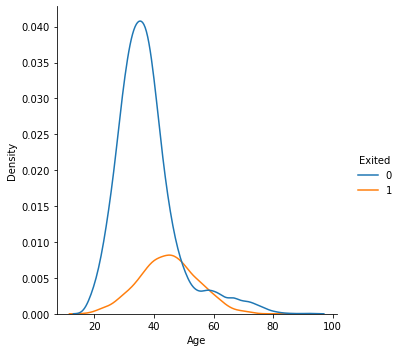

In [ ]:
_= sns.displot(
                x= 'Age',
                hue = 'Exited',
                kind = 'kde',
                data = ad
               )

In [ ]:
#count of customers age category-wise
ad['Age_cat'].value_counts()

mid-aged    7568
young       1968
senior       464
Name: Age_cat, dtype: int64

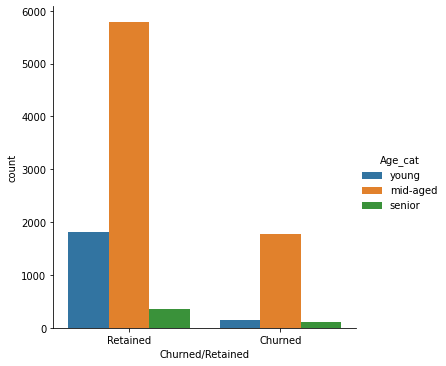

In [ ]:
#seeing age-category wise churn
sns.catplot(
               x = 'Churned/Retained',
               hue = 'Age_cat',
               kind = 'count',
               data = ad
             )

In [ ]:
#checking the churn based on credit score
ad["CredScoreCat"]=pd.cut( 
                                ad['CreditScore'],
                                bins=[300,579,669,739,799,900],
                                labels=['Poor','Fair','Good','Very good','Excellent']
)

ad.to_csv('churn_mod.csv', index=False)

<AxesSubplot:xlabel='Churned/Retained', ylabel='count'>

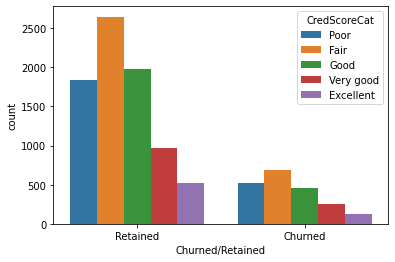

In [ ]:
#Analyzing churn based on credit score category
sns.countplot(
                  x = 'Churned/Retained',   # Countplot
                  hue = 'CredScoreCat',       # subset by 'Credit score'
                  data = ad
                 )

In [ ]:
ad['Balance'].max()

250898.09

In [ ]:
ad['Balance'].min()

0.0

In [ ]:
#making balance and income category
ad["BalanceCat"]=pd.cut( 
                                ad['Balance'],
                                bins=[0,20000,50000,100000,200000],
                                labels=['Low','Avg','Good','High']
)

ad.to_csv('churn_mod.csv', index=False)
ad.shape

(10000, 17)

<AxesSubplot:xlabel='Churned/Retained', ylabel='count'>

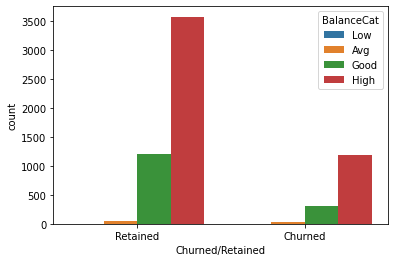

In [ ]:
#churn based on Balance
sns.countplot(
                  x = 'Churned/Retained',   
                  hue = 'BalanceCat',       
                  data = ad
                 )

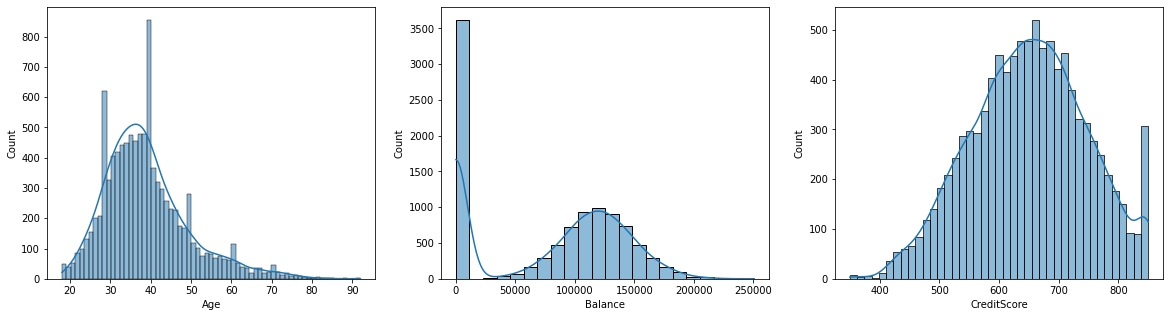

In [ ]:
columns = ['Age', 'Balance', 'CreditScore']

# 7.2.1
fig,ax = plt.subplots(1,3, figsize = (20,5))

# 7.2.2
ax = ax.flatten()

# 7.2.3
for i in range(len(columns)):
    _ = sns.histplot(ad[columns[i]],ax = ax[i], kde = True)

<AxesSubplot:xlabel='Churned/Retained', ylabel='count'>

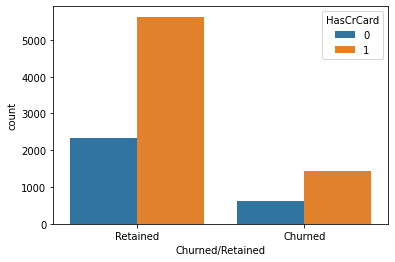

In [ ]:
sns.countplot(
                  x = 'Churned/Retained',   
                  hue = 'HasCrCard',       
                  data = ad
                 )

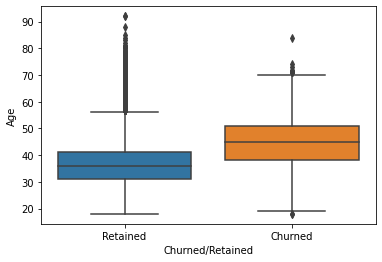

In [ ]:
_=sns.boxplot(x = 'Churned/Retained',     
              y = 'Age',                  
              data = ad
              )

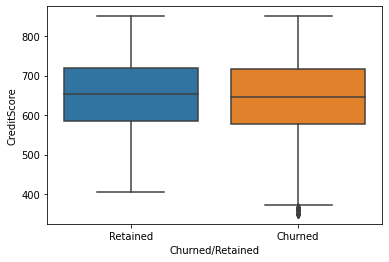

In [ ]:
_=sns.boxplot(x = 'Churned/Retained',     
              y = 'CreditScore',                  
              data = ad
              )

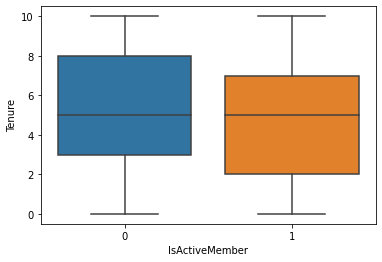

In [ ]:
_=sns.boxplot(x = 'IsActiveMember',     
              y = 'Tenure',                  
              data = ad
              )

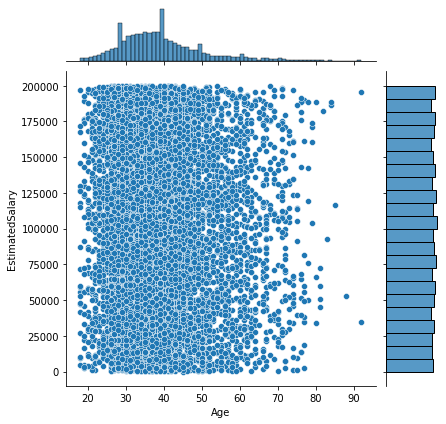

In [8]:
_ = sns.jointplot(
                   x = 'Age',
                   y=  'EstimatedSalary',
                   data = ad
                  )

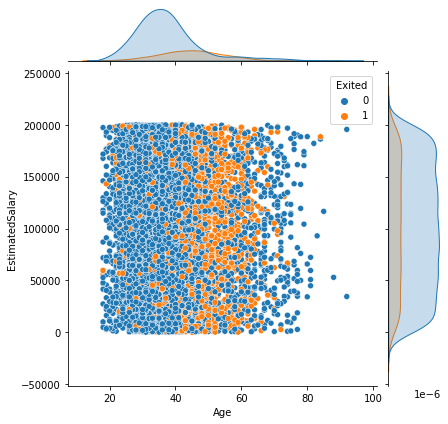

In [10]:
###$ Jointplots can be made more informative by adding hue

_ = sns.jointplot(
                   x = 'Age',
                   y=  'EstimatedSalary',
                   hue = 'Exited',
                   data = ad
                  )

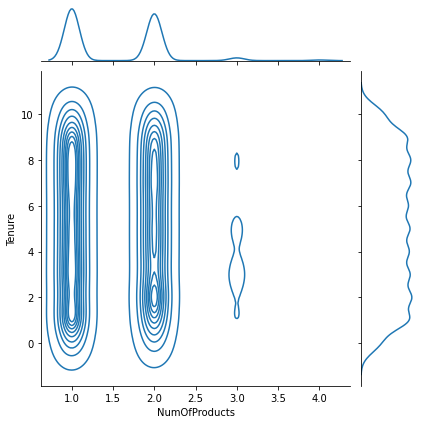

In [ ]:
###$ Jointplots is never drawn when either one of features
# is discrete, as here
_= sns.jointplot(
                 data = ad,
                 x = 'NumOfProducts',
                 y = 'Tenure',
                 kind = "kde"
                )

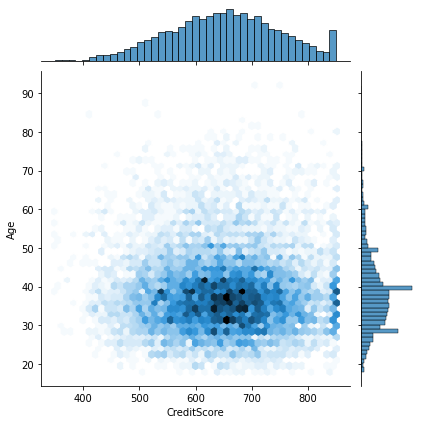

In [ ]:
_= sns.jointplot(
                 data = ad,
                 x = 'CreditScore',
                 y = 'Age',
                 kind = "hex"
                )

In [ ]:
ad.head(1)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Churned/Retained,Tenure_cat,Age_cat,CredScoreCat,BalanceCat
0,15634602,619,France,Female,42,2,0.0,1,1,1,101348.88,1,Churned,short,mid-aged,Fair,NaN
